In [180]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import fftpack
%pylab inline
plt.style.use('seaborn-whitegrid')
pylab.rcParams['figure.figsize'] = (22, 6)
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
from scipy.signal import correlate

Populating the interactive namespace from numpy and matplotlib


C:\Users\s158079\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['correlate', 'datetime', 'fftpack']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [181]:
df1 = pd.read_csv('Data/BMS/Rooms and HVAC/RCU middenhal.csv', delimiter=';', encoding='utf-8')
df2 = pd.read_csv('Data/tickets-8min.csv', delimiter=',', encoding='utf-8')

In [182]:
df_ticketing = pd.DataFrame()

In [183]:
df_ticketing['time'] = pd.to_datetime(df2['period ending'], format="%Y-%m-%d %H:%M:%S")
df_ticketing['visitors'] = df2['visitors']

In [184]:
df_ticketing.sort_values(['time'], inplace=True)

In [185]:
def shift(row, mean):

    return (row - mean)

In [186]:
def multi_resolution_ticketing(df, column1, freq):

    grouped =  df.groupby(pd.Grouper(key='time', freq=freq))
    norm_df = pd.DataFrame()
    
    mean_ticketing_list = []
    
    for name, group in grouped:
        df_sub = pd.DataFrame(group)
        
        mean_tick = df_sub[column1].mean()
        mean_ticketing_list.append(mean_tick)
        df_sub['Ticketing_piecewise'] = mean_tick
        
        df_sub['Ticketing_shifted'] = df_sub.apply(lambda row: shift(row[column1], mean_tick), axis=1)
        
        norm_df = norm_df.append(df_sub)
    
    return norm_df, mean_ticketing_list


In [187]:
df_ticketing['visitors_rm'] = pd.rolling_mean(df_ticketing['visitors'], 180)

C:\Users\s158079\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=180,center=False).mean()
  """Entry point for launching an IPython kernel.


In [188]:
df_ticketing['visitors_rm'].fillna(0, inplace=True)

In [189]:
df_ticketing, mean_ticketing_week = multi_resolution_ticketing(df_ticketing, 'visitors_rm', 'W')

In [190]:
df_ticketing.columns = ['time', 'visitors','visitors_rm', 'Ticketing_piecewise_week', 'Ticketing_shifted_week']

In [191]:
df_ticketing, mean_ticketing_day = multi_resolution_ticketing(df_ticketing, 'Ticketing_shifted_week', 'D')

In [192]:
df_ticketing.columns = ['time', 'visitors','visitors_rm', 'Ticketing_piecewise_week', 'Ticketing_shifted_week', \
                       'Ticketing_piecewise_day', 'Ticketing_shifted_day']

In [193]:
df_ticketing, mean_ticketing_2H = multi_resolution_ticketing(df_ticketing, 'Ticketing_shifted_day', '2H')

In [194]:
df_ticketing.columns = ['time', 'visitors','visitors_rm', 'Ticketing_piecewise_week', 'Ticketing_shifted_week', \
                       'Ticketing_piecewise_day', 'Ticketing_shifted_day', 'Ticketing_piecewise_2H', 'Ticketing_shifted_2H' ]

In [195]:
df_ticketing, mean_ticketing_32Min = multi_resolution_ticketing(df_ticketing, 'Ticketing_shifted_2H', '32Min')

In [196]:
df_ticketing.columns = ['time', 'visitors','visitors_rm', 'Ticketing_piecewise_week', 'Ticketing_shifted_week', \
                       'Ticketing_piecewise_day', 'Ticketing_shifted_day', 'Ticketing_piecewise_2H', 'Ticketing_shifted_2H',
                       'Ticketing_piecewise_32Min', 'Ticketing_shifted_32Min']

In [197]:
df_ticketing, mean_ticketing_16Min = multi_resolution_ticketing(df_ticketing, 'Ticketing_shifted_32Min', '16Min')

In [198]:
df_ticketing.columns = ['time', 'visitors','visitors_rm', 'Ticketing_piecewise_week', 'Ticketing_shifted_week', \
                       'Ticketing_piecewise_day', 'Ticketing_shifted_day', 'Ticketing_piecewise_2H', 'Ticketing_shifted_2H',
                       'Ticketing_piecewise_32Min', 'Ticketing_shifted_32Min', \
                        'Ticketing_piecewise_16Min', 'Ticketing_shifted_16Min']

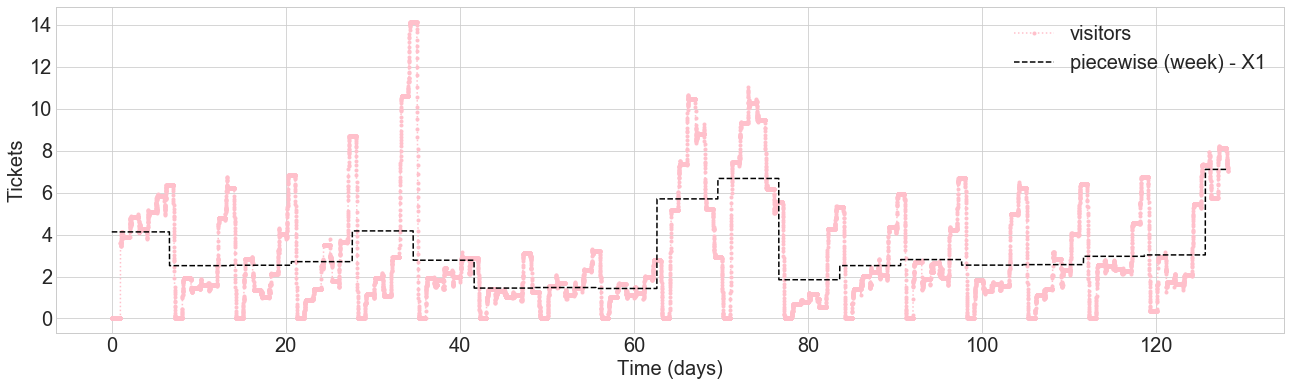

In [199]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_ticketing['visitors_rm'])+1)]
plt.plot(x_range, df_ticketing['visitors_rm'], linestyle=':', marker='.', color="pink", label="visitors")
plt.plot(x_range, df_ticketing['Ticketing_piecewise_week'], linestyle='--', color="black", label = "piecewise (week) - X1")
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Tickets')
plt.show()

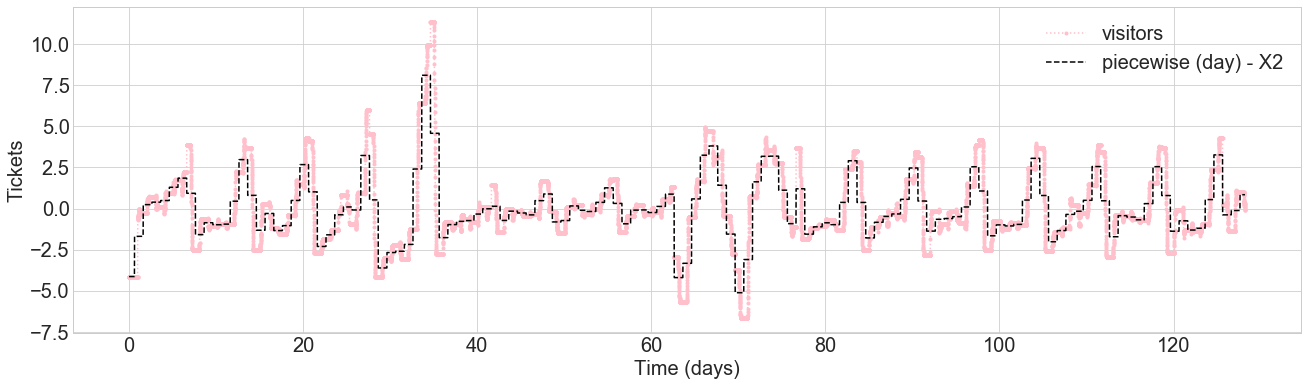

In [200]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_ticketing['visitors_rm'])+1)]
plt.plot(x_range, df_ticketing['Ticketing_shifted_week'], linestyle=':', marker='.', color="pink", label="visitors")
plt.plot(x_range, df_ticketing['Ticketing_piecewise_day'], linestyle='--', color="black", label = "piecewise (day) - X2")
plt.legend()
plt.ylabel('Tickets')
plt.xlabel('Time (days)')
plt.show()

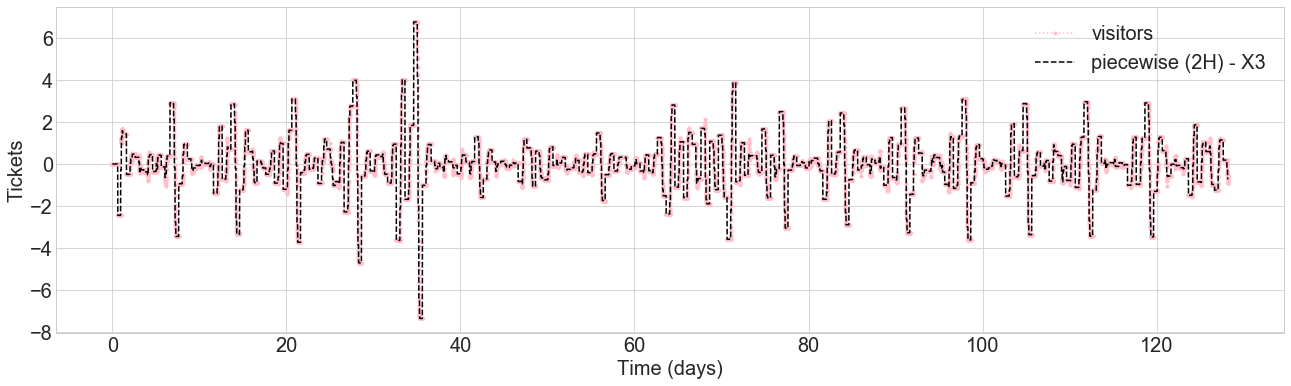

In [201]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_ticketing['visitors_rm'])+1)]
plt.plot(x_range, df_ticketing['Ticketing_shifted_day'], linestyle=':', marker='.', color="pink", label="visitors")
plt.plot(x_range, df_ticketing['Ticketing_piecewise_2H'], linestyle='--', color="black", label = "piecewise (2H) - X3")
plt.legend()
plt.ylabel('Tickets')
plt.xlabel('Time (days)')
plt.show()

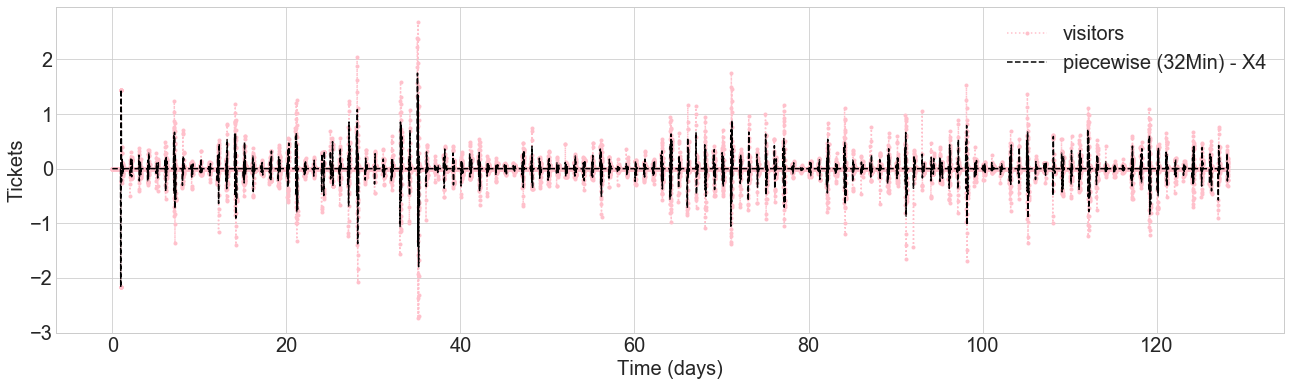

In [202]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_ticketing['visitors_rm'])+1)]
plt.plot(x_range, df_ticketing['Ticketing_shifted_2H'], linestyle=':', marker='.', color="pink", label="visitors")
plt.plot(x_range, df_ticketing['Ticketing_piecewise_32Min'], linestyle='--', color="black", label = "piecewise (32Min) - X4")
plt.legend()
plt.ylabel('Tickets')
plt.xlabel('Time (days)')
plt.show()

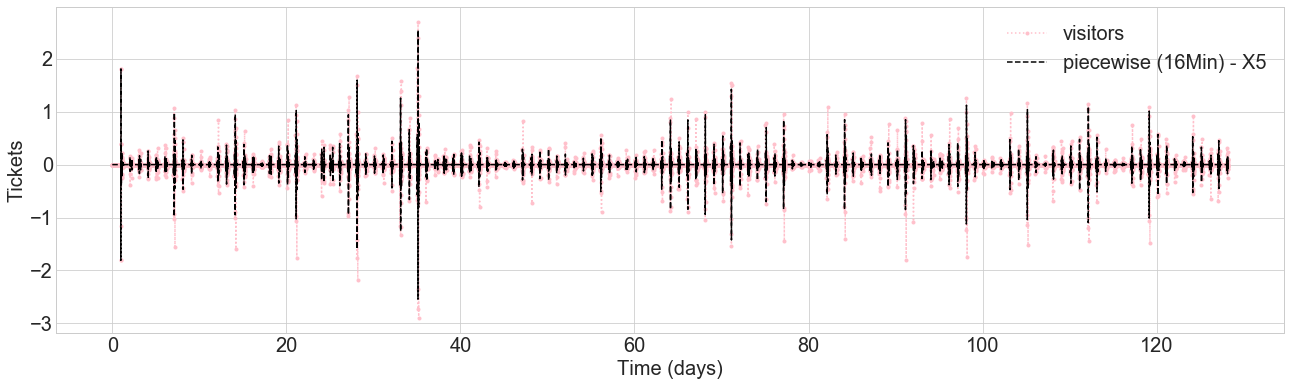

In [203]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_ticketing['visitors_rm'])+1)]
plt.plot(x_range, df_ticketing['Ticketing_shifted_32Min'], linestyle=':', marker='.', color="pink", label="visitors")
plt.plot(x_range, df_ticketing['Ticketing_piecewise_16Min'], linestyle='--', color="black", label = "piecewise (16Min) - X5")
plt.legend()
plt.ylabel('Tickets')
plt.xlabel('Time (days)')
plt.show()

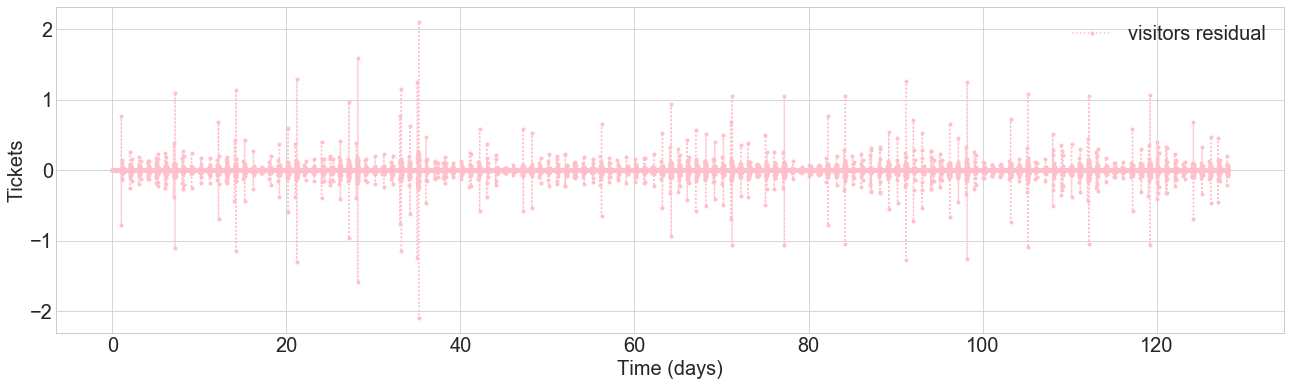

In [204]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_ticketing['visitors_rm'])+1)]
plt.plot(x_range, df_ticketing['Ticketing_shifted_16Min'], linestyle=':', marker='.', color="pink", label="visitors residual")
plt.legend()
plt.ylabel('Tickets')
plt.xlabel('Time (days)')
plt.show()

In [211]:
df_data = df1[['Tijdstip', 'Gemiddelde ruimtetemp [°C] - RCU Middelhal 255 ()', 'Luchtkwaliteitopnemer [ppm] - RCU Middelhal 255 (255QT01)']]
df_data.is_copy = False
df_data.columns = ['Time', 'Temperature', 'CO2']

In [212]:
df_data.is_copy = False
df_data['Time'] = pd.to_datetime(df_data['Time'], format="%d-%m-%Y %H:%M.%S")

df_data['Temperature'] = [str(x).replace(',', '.') for x in df_data['Temperature']]
df_data['Temperature'] = pd.to_numeric(df_data['Temperature'], errors='coerce')
df_data['CO2'] = pd.to_numeric(df_data['CO2'], errors='coerce')

In [213]:
df_data = df_data.loc[df_data['Time'] > datetime.datetime(2017, 10, 23, 9, 0, 0)]
df_data = df_data.loc[df_data['Time'] <= datetime.datetime(2018, 2, 28, 13, 56, 0)]

In [214]:
df_data.sort_values(['Time'], inplace=True)
df_data.reset_index(drop=True, inplace=True)

In [215]:
df_data['Temperature'].fillna(df_data['Temperature'].mean(), inplace=True)
df_data['CO2'].fillna(df_data['CO2'].mean(), inplace=True)

In [217]:
mean1 = df_data['Temperature'].mean()
df_data['Temperature_centered'] = [i-mean1 for i in df_data['Temperature']]

mean2 = df_data['CO2'].mean()
df_data['CO2_centered'] = [i-mean2 for i in df_data['CO2']]

In [218]:


def multi_resolution(df, column1, column2, freq):

    grouped =  df.groupby(pd.Grouper(key='Time', freq=freq))
    norm_df = pd.DataFrame()
    
    mean_temp_list = []
    mean_CO2_list = []
    
    mean_temp_list_actual = []
    mean_CO2_list_actual = []
    
    for name, group in grouped:
        df_sub = pd.DataFrame(group)
        
        mean_temp = df_sub[column1].mean()
        mean_temp_actual = df_sub['Temperature'].mean()
        mean_temp_list.append(mean_temp)
        mean_temp_list_actual.append(mean_temp_actual)
        df_sub['Temperature_piecewise'] = mean_temp
        
        mean_CO2 = df_sub[column2].mean()
        mean_CO2_actual = df_sub['CO2'].mean()
        mean_CO2_list.append(mean_CO2)
        mean_CO2_list_actual.append(mean_CO2_actual)
        df_sub['CO2_piecewise'] = mean_CO2
        
        df_sub['Temperature_shifted'] = df_sub.apply(lambda row: shift(row[column1], mean_temp), axis=1)
        df_sub['CO2_shifted'] = df_sub.apply(lambda row: shift(row[column2], mean_CO2), axis=1)
        
        norm_df = norm_df.append(df_sub)
    
    return norm_df, list(mean_temp_list), list(mean_CO2_list), list(mean_temp_list_actual), list(mean_CO2_list_actual)

In [219]:
df_data, mean_temp_week, mean_CO2_week, mean_temp_week_actual, mean_CO2_week_actual = multi_resolution(df_data, 'Temperature', \
                                                        'CO2', 'W')

In [220]:
df_data.columns = ['Time', 'Temperature', 'CO2', 'Temperature_centered', 'CO2_centered', \
                  'Temperature_piecewise_week', 'CO2_piecewise_week', 'Temperature_shifted_week', 'CO2_shifted_week']

In [221]:
df_data, mean_temp_day, mean_CO2_day, mean_temp_day_actual, mean_CO2_day_actual = multi_resolution(df_data, 'Temperature_shifted_week', \
                                                      'CO2_shifted_week', 'D')

In [222]:
df_data.columns = ['Time', 'Temperature', 'CO2', 'Temperature_centered', 'CO2__centered', \
                  'Temperature_piecewise_week', 'CO2_piecewise_week', 'Temperature_shifted_week', 'CO2_shifted_week', \
                  'Temperature_piecewise_day', 'CO2_piecewise_day', 'Temperature_shifted_day', 'CO2_shifted_day']

In [223]:
df_data, mean_temp_2H, mean_CO2_2H, mean_temp_2H_actual, mean_CO2_2H_actual = multi_resolution(df_data, 'Temperature_shifted_day', \
                                                      'CO2_shifted_day', '2H')

In [224]:
df_data.columns = ['Time', 'Temperature', 'CO2', 'Temperature_centered', 'CO2_centered', \
                  'Temperature_piecewise_week', 'CO2_piecewise_week', 'Temperature_shifted_week', 'CO2_shifted_week', \
                  'Temperature_piecewise_day', 'CO2_piecewise_day', 'Temperature_shifted_day', 'CO2_shifted_day', \
                  'Temperature_piecewise_2H', 'CO2_piecewise_2H', 'Temperature_shifted_2H', 'CO2_shifted_2H']

In [225]:
df_data, mean_temp_32Min, mean_CO2_32Min, mean_temp_32Min_actual, mean_CO2_32Min_actual = multi_resolution(df_data, 'Temperature_shifted_2H', \
                                                      'CO2_shifted_2H', '32Min')

In [226]:
df_data.columns = ['Time', 'Temperature', 'CO2', 'Temperature_centered', 'CO2_centered', \
                  'Temperature_piecewise_week', 'CO2_piecewise_week', 'Temperature_shifted_week', 'CO2_shifted_week', \
                  'Temperature_piecewise_day', 'CO2_piecewise_day', 'Temperature_shifted_day', 'CO2_shifted_day', \
                  'Temperature_piecewise_2H', 'CO2_piecewise_2H', 'Temperature_shifted_2H', 'CO2_shifted_2H', \
                  'Temperature_piecewise_32Min', 'CO2_piecewise_32Min', 'Temperature_shifted_32Min', 'CO2_shifted_32Min']

In [227]:
df_data, mean_temp_16Min, mean_CO2_16Min, mean_temp_16Min_actual, mean_CO2_16Min_actual = multi_resolution(df_data, 'Temperature_shifted_32Min', \
                                                      'CO2_shifted_32Min', '16Min')

In [228]:
df_data.columns = ['Time', 'Temperature', 'CO2', 'Temperature_centered', 'CO2_centered', \
                  'Temperature_piecewise_week', 'CO2_piecewise_week', 'Temperature_shifted_week', 'CO2_shifted_week', \
                  'Temperature_piecewise_day', 'CO2_piecewise_day', 'Temperature_shifted_day', 'CO2_shifted_day', \
                  'Temperature_piecewise_2H', 'CO2_piecewise_2H', 'Temperature_shifted_2H', 'CO2_shifted_2H', \
                  'Temperature_piecewise_32Min', 'CO2_piecewise_32Min', 'Temperature_shifted_32Min', 'CO2_shifted_32Min', \
                  'Temperature_piecewise_16Min', 'CO2_piecewise_16Min', 'Temperature_shifted_16Min', 'CO2_shifted_16Min']

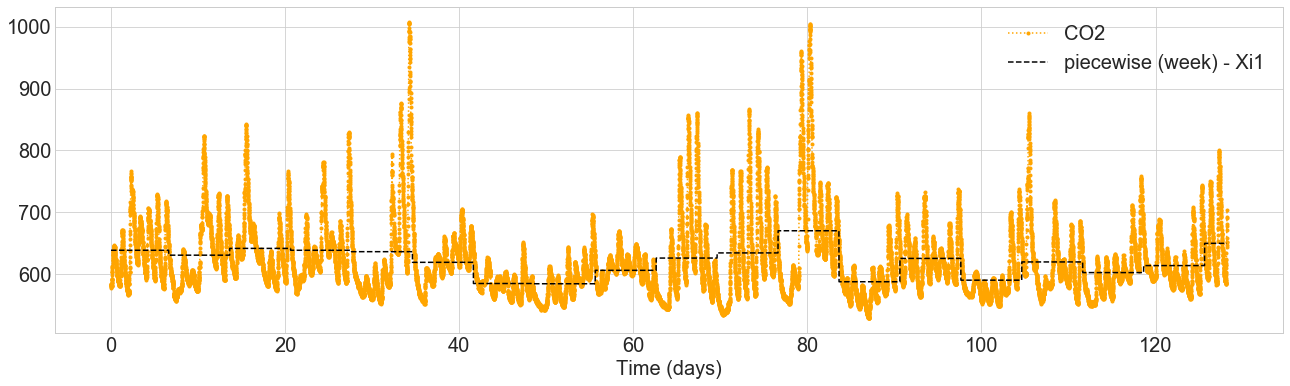

In [229]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_data['CO2'])+1)]
plt.plot(x_range, df_data['CO2'], linestyle=':', marker='.', color="orange", label="CO2")
plt.plot(x_range, df_data['CO2_piecewise_week'], linestyle='--', color="black", label = "piecewise (week) - Xi1")
plt.legend()
plt.xlabel('Time (days)')
plt.show()

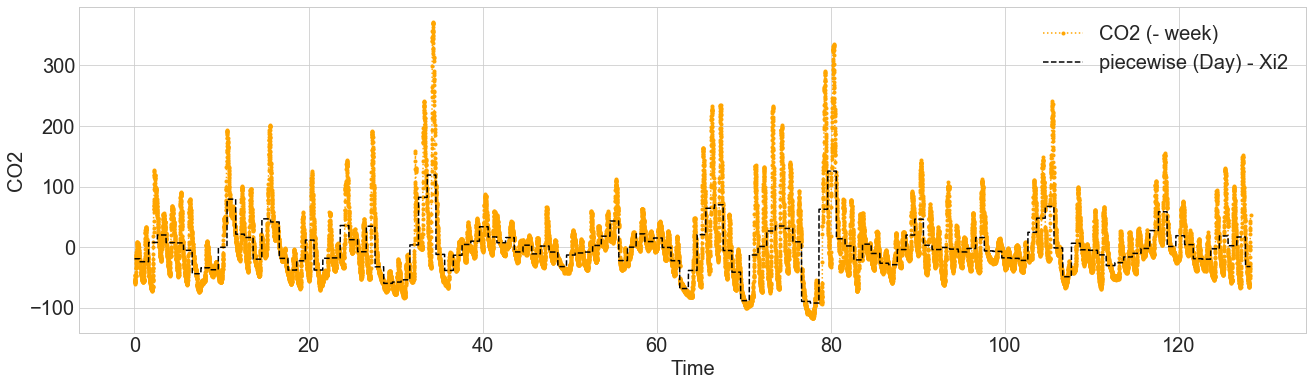

In [230]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_data['CO2'])+1)]
plt.plot(x_range, df_data['CO2_shifted_week'], linestyle=':', marker='.', color="orange", label="CO2 (- week)")
plt.plot(x_range, df_data['CO2_piecewise_day'], linestyle='--', color="black", label = "piecewise (Day) - Xi2")
plt.legend()
plt.xlabel('Time')
plt.ylabel('CO2')
plt.show()

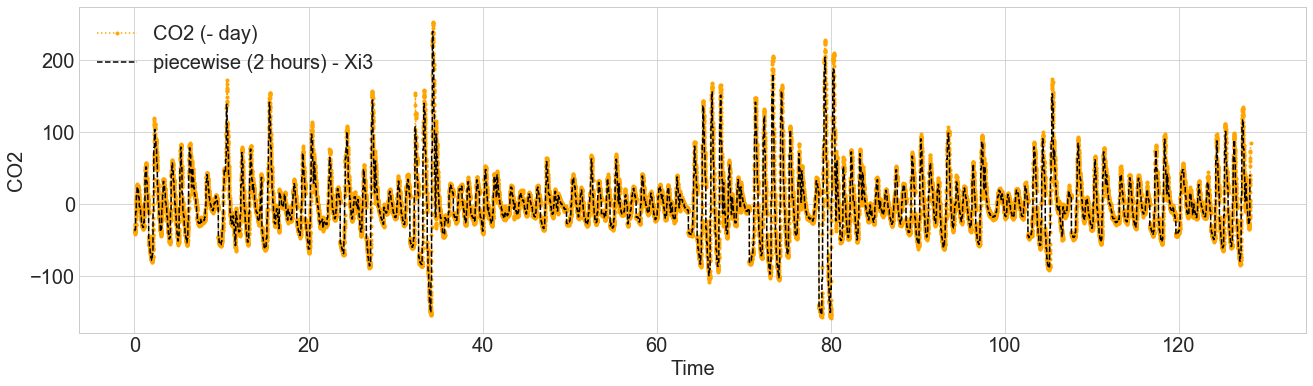

In [231]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_data['CO2'])+1)]
plt.plot(x_range, df_data['CO2_shifted_day'], linestyle=':', marker='.', color="orange", label="CO2 (- day)")
plt.plot(x_range, df_data['CO2_piecewise_2H'], linestyle='--', color="black", label = "piecewise (2 hours) - Xi3")
plt.legend()
plt.xlabel('Time')
plt.ylabel('CO2')
plt.show()

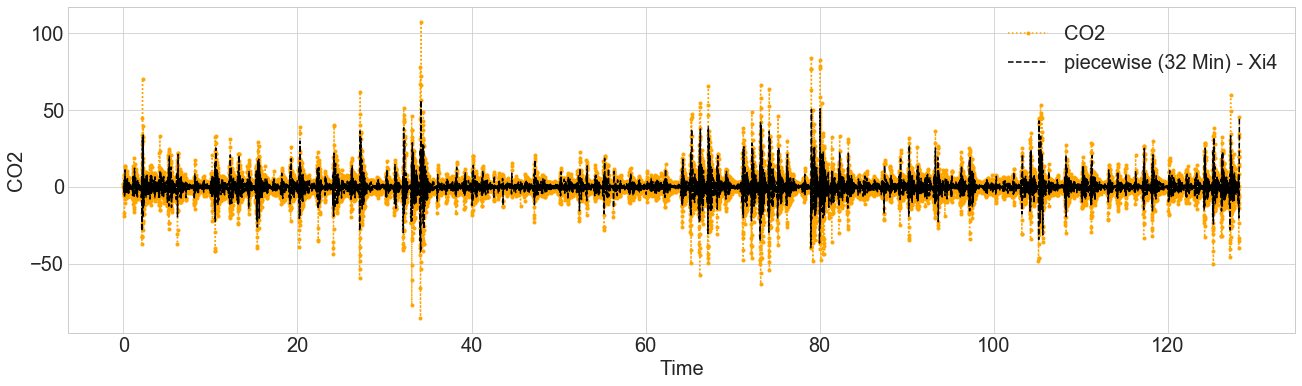

In [232]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_data['CO2'])+1)]
plt.plot(x_range, df_data['CO2_shifted_2H'], linestyle=':', marker='.', color="orange", label="CO2")
plt.plot(x_range, df_data['CO2_piecewise_32Min'], linestyle='--', color="black", label = "piecewise (32 Min) - Xi4")
plt.legend()
plt.xlabel('Time')
plt.ylabel('CO2')
plt.show()

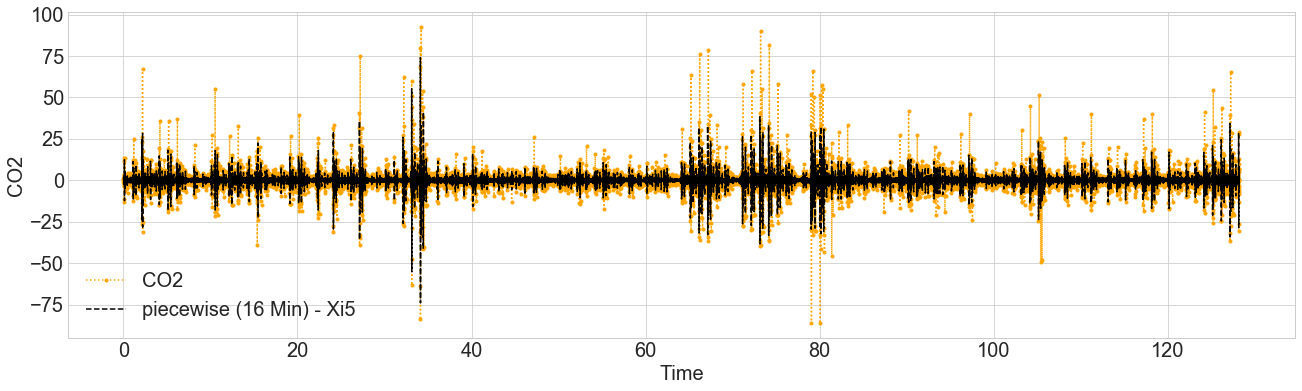

In [233]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_data['CO2'])+1)]
plt.plot(x_range, df_data['CO2_shifted_32Min'], linestyle=':', marker='.', color="orange", label="CO2")
plt.plot(x_range, df_data['CO2_piecewise_16Min'], linestyle='--', color="black", label = "piecewise (16 Min) - Xi5")
plt.legend()
plt.xlabel('Time')
plt.ylabel('CO2')
plt.show()

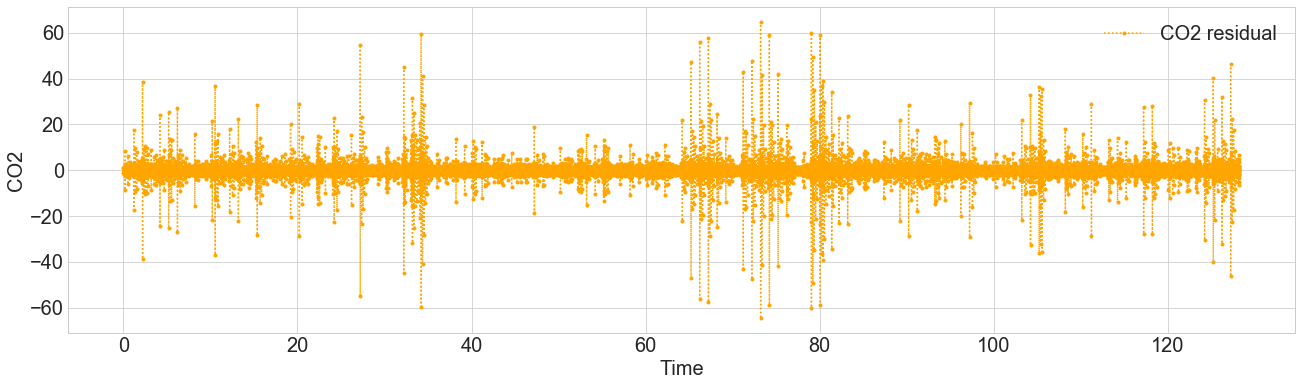

In [234]:
x_range =[(m*480)/(60*60*24) for m in range(1, len(df_data['CO2'])+1)]
plt.plot(x_range, df_data['CO2_shifted_16Min'], linestyle=':', marker='.', color="orange", label="CO2 residual")
plt.legend()
plt.xlabel('Time')
plt.ylabel('CO2')
plt.show()

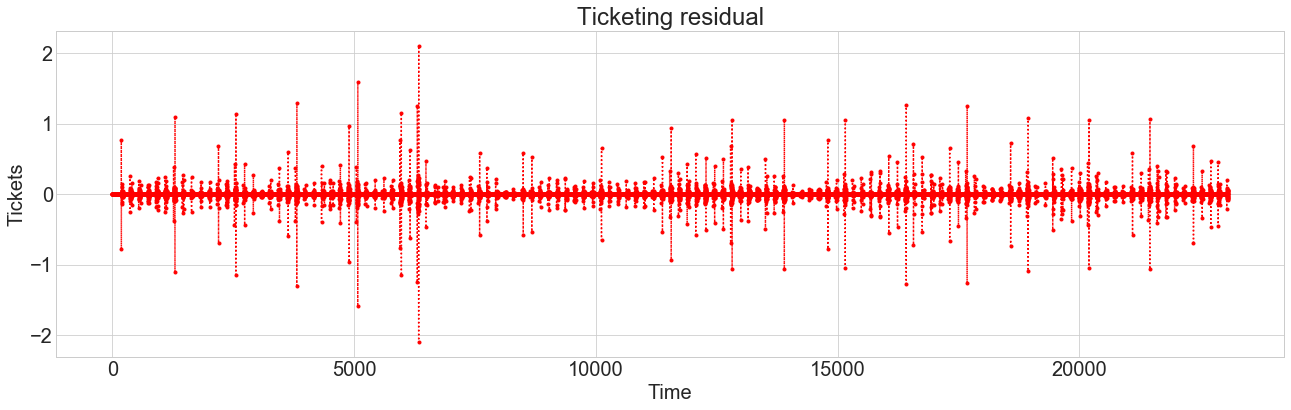

In [137]:
pylab.rcParams['figure.figsize'] = (22, 6)
plt.plot(range(len(df_ticketing['Ticketing_shifted_16Min'])), df_ticketing['Ticketing_shifted_16Min'], linestyle=':', marker='.', color="red")
plt.xlabel('Time')
plt.ylabel('Tickets')
plt.title('Ticketing residual')
plt.show()

In [272]:
CO2_residual_norm = list(df_data['CO2_shifted_16Min'] / np.linalg.norm(df_data['CO2_shifted_16Min']))
tickets_residual_norm = list(df_ticketing['Ticketing_shifted_16Min'] / np.linalg.norm(df_ticketing['Ticketing_shifted_16Min']))
cross_corr = correlate(CO2_residual_norm, tickets_residual_norm)

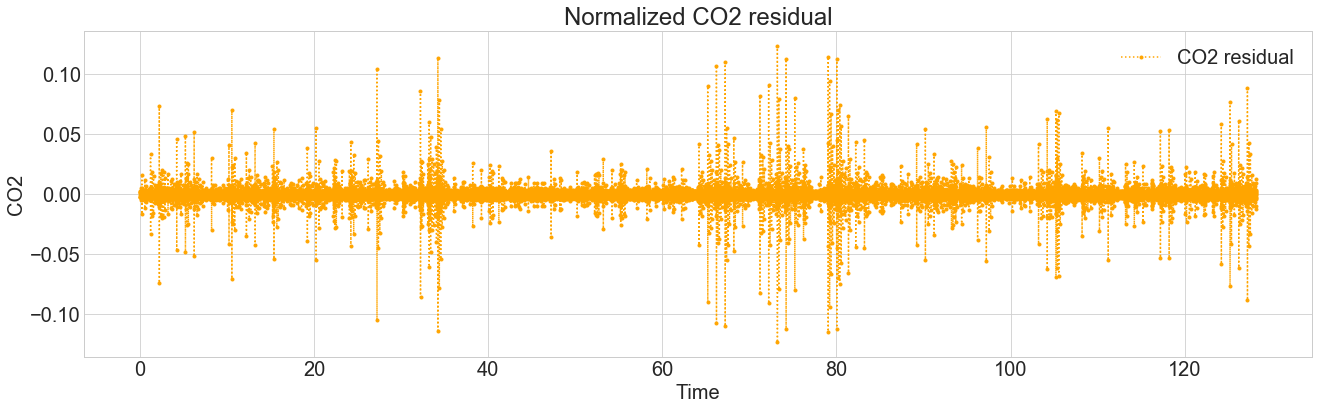

In [236]:
pylab.rcParams['figure.figsize'] = (22, 6)
x_range =[(m*480)/(60*60*24) for m in range(1, len(CO2_residual_norm)+1)]
plt.plot(x_range, CO2_residual_norm, linestyle=':', marker='.', color="orange", label="CO2 residual")
plt.legend()
plt.title('Normalized CO2 residual')
plt.xlabel('Time')
plt.ylabel('CO2')
plt.show()

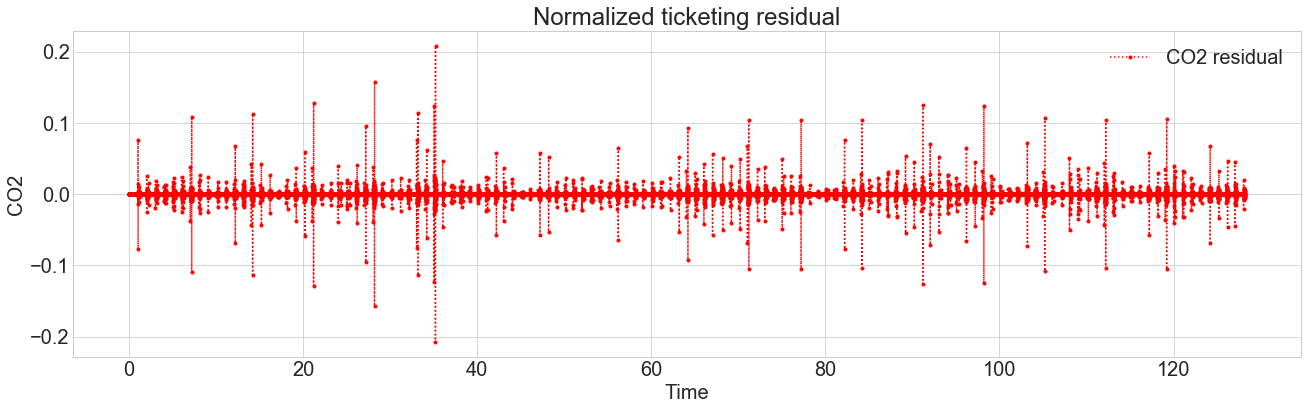

In [237]:
pylab.rcParams['figure.figsize'] = (22, 6)
x_range =[(m*480)/(60*60*24) for m in range(1, len(tickets_residual_norm)+1)]
plt.plot(x_range, tickets_residual_norm, linestyle=':', marker='.', color="red", label="CO2 residual")
plt.legend()
plt.title('Normalized ticketing residual')
plt.xlabel('Time')
plt.ylabel('CO2')
plt.show()

In [239]:
print(len(CO2_residual_norm))
print(len(tickets_residual_norm))

23078
23078


In [250]:
residual_df = pd.DataFrame()
residual_df['tickets'] = list(tickets_residual_norm)
residual_df['CO2'] = list(CO2_residual_norm)

,tickets,CO2
count,2.307800e+04,2.307800e+04
mean,4.359735e-21,4.510071e-22
std,6.582795e-03,6.582795e-03
min,-2.081275e-01,-1.233289e-01
25%,0.000000e+00,-1.905183e-03
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.905183e-03
max,2.081275e-01,1.233289e-01


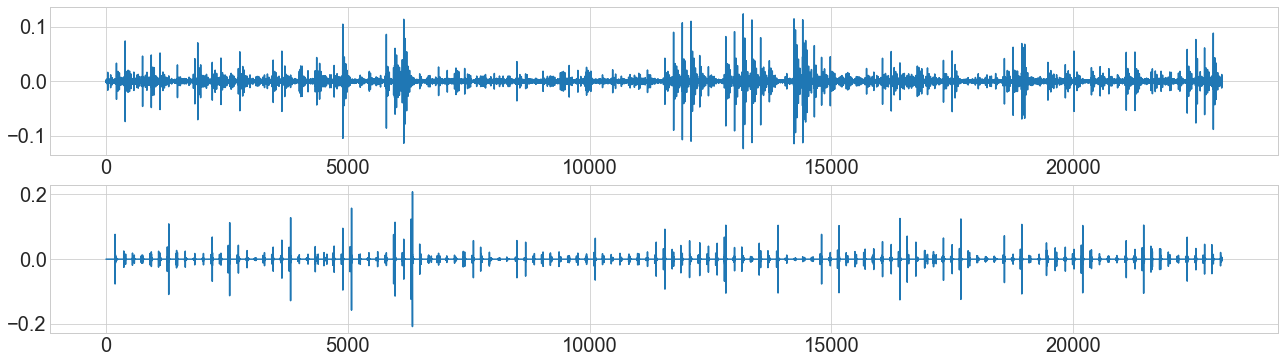

In [251]:
pylab.rcParams['figure.figsize'] = (22, 6)
plt.subplot(2,1,1)
plt.plot(residual_df['CO2'])
plt.subplot(2,1,2)
plt.plot(residual_df['tickets'])
residual_df.describe()

In [271]:
maxi = 0
ind=-1
for i in range(0, len(residual_df['tickets'])):
    cor = residual_df['CO2'].corr(residual_df['tickets'].shift(i))
    if cor > maxi:
        maxi = cor
        ind = i
print(maxi)
print(ind-)

0.606906027965
22710


C:\Users\s158079\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\s158079\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [262]:
len(residual_df['CO2'])

23078

In [265]:
len(residual_df['tickets'])-22710

368

In [254]:
368*8/60

49.06666666666667

Text(0.5,1,'Cross correlation of CO2 and Visitors residual')

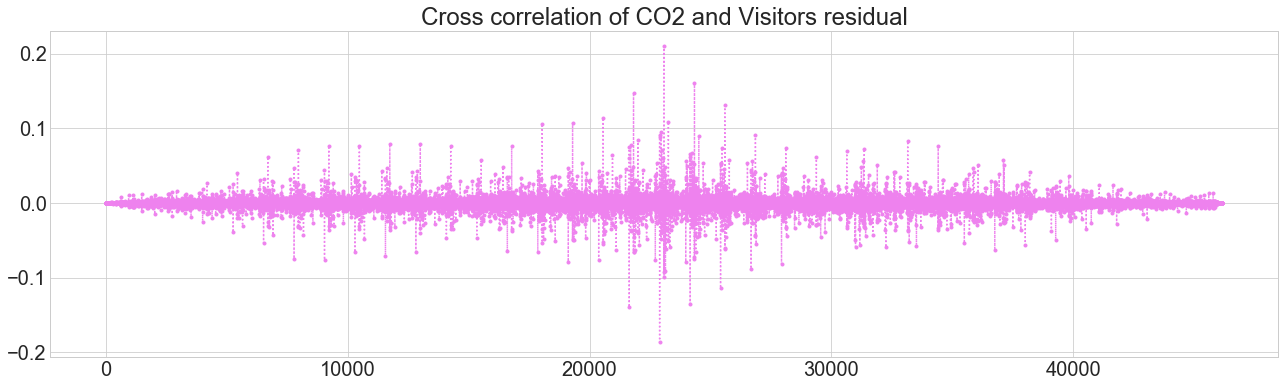

In [273]:
plt.plot(cross_corr, linestyle=':', marker='.', color="violet")
plt.title('Cross correlation of CO2 and Visitors residual')

In [274]:
print(np.max(cross_corr))
print(np.argmax(cross_corr))
print(len(tickets_residual_norm))

0.210147009979
23077
23078


In [143]:
(13074-13066)

8

In [259]:
lag = np.argmax(correlate(CO2_residual_norm, tickets_residual_norm, mode="full"))
c_sig = np.roll(tickets_residual_norm, shift=int(np.ceil(lag)))

In [260]:
lag

23077

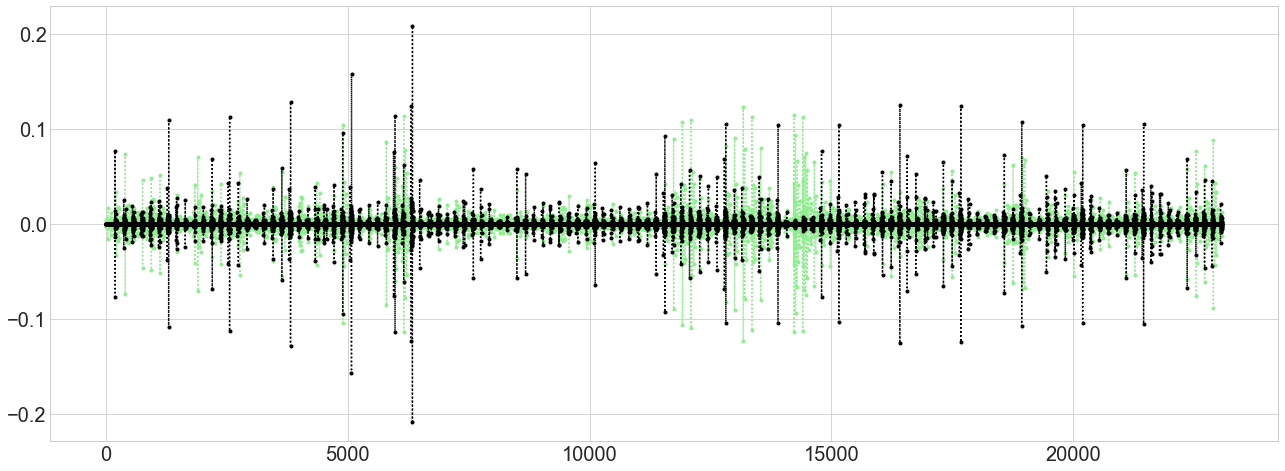

In [121]:
pylab.rcParams['figure.figsize'] = (22, 8)
ax1.set_ylim([-0.25, 0.25])
plt.plot(range(len(CO2_residual_norm)), CO2_residual_norm, linestyle=':', marker='.', color="lightgreen")
plt.plot(range(len(c_sig)),  c_sig, linestyle=':', marker='.', color="black")

In [149]:
alpha=0.5
aa = pd.Series(list(CO2_residual_norm))-alpha*(pd.Series(c_sig))

(-0.25, 0.25)

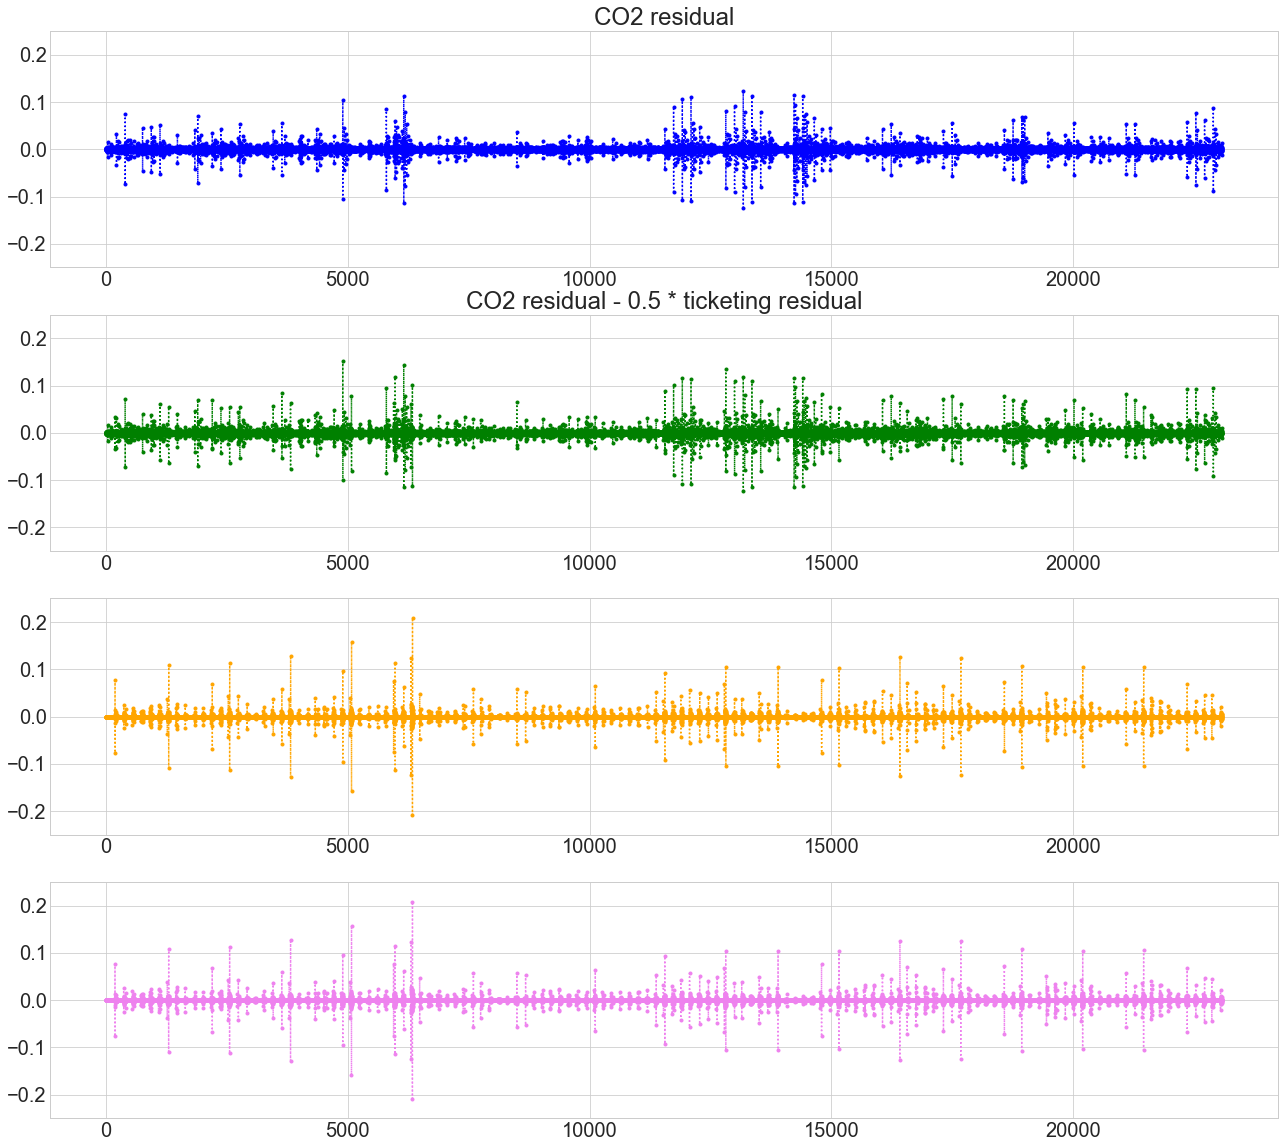

In [154]:
pylab.rcParams['figure.figsize'] = (22, 20)
ax1 = plt.subplot(4, 1, 1)
ax1.set_ylim([-0.25, 0.25])
plt.title('CO2 residual')
plt.plot(range(len(CO2_residual_norm)), CO2_residual_norm, linestyle=':', marker='.', color="blue")
ax2 = plt.subplot(4, 1, 2)
plt.plot(range(len(aa)), aa, linestyle=':', marker='.', color="green")
plt.title('CO2 residual - ' + str(alpha) + ' * ticketing residual')
ax2.set_ylim([-0.25, 0.25])
ax3 = plt.subplot(4, 1, 3)
plt.plot(range(len(tickets_residual_norm)), tickets_residual_norm, linestyle=':', marker='.', color="orange")
ax3.set_ylim([-0.25, 0.25])
ax4 = plt.subplot(4, 1, 4)
plt.plot(range(len(tickets_residual_norm)), c_sig, linestyle=':', marker='.', color="violet")
ax4.set_ylim([-0.25, 0.25])

In [ ]:
import numpy as np
import scipy.stats as stats
import pylab as pl
import statsmodels.api as sm

h = sorted(list(df_data['CO2_shifted_16Min']))  #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h, bins=250, normed=True)      #use this to draw histogram of your data
# pl.xlim([-20, 20])
pl.show()          

In [ ]:
def autocorr(x):
    result = numpy.correlate(x, x, mode='full')
    return result[int(result.size/2):]

In [ ]:
mean1 = np.mean(mean_CO2_day_actual)
mean_CO2_day_actual_centered =  [i-mean1 for i in mean_CO2_day_actual]

mean2 = np.mean(mean_CO2_2H_actual)
mean_CO2_2H_actual_centered =  [i-mean2 for i in mean_CO2_2H_actual]

In [ ]:
pylab.rcParams['figure.figsize'] = (24, 20)

plt.subplot(3,2,1)
mean_CO2_week_centered = mean_CO2_week-np.mean(mean_CO2_week) 
plt.plot(autocorr(mean_CO2_week_centered))
plt.title('Autocorrelaion of ' + r'$\xi_1$' + ' (Week)')

plt.subplot(3,2,2)
mean_CO2_day_centered = mean_CO2_day-np.mean(mean_CO2_day) 
plt.plot(autocorr(mean_CO2_day_centered))
plt.title('Autocorrelaion of ' + r'$\xi_2$' + ' (Day)')

plt.subplot(3,2,3)
mean_CO2_2H_centered = mean_CO2_2H-np.mean(mean_CO2_2H) 
plt.plot(autocorr(mean_CO2_2H_centered))
plt.title('Autocorrelaion of ' + r'$\xi_3$' + ' (2H)')

plt.subplot(3,2,4)
mean_CO2_32Min_centered = mean_CO2_32Min-np.mean(mean_CO2_32Min) 
plt.plot(autocorr(mean_CO2_32Min_centered))
plt.title('Autocorrelaion of ' + r'$\xi_4$' + ' (32Min)')

plt.subplot(3,2,5)
mean_CO2_16Min_centered = mean_CO2_16Min-np.mean(mean_CO2_16Min) 
plt.plot(autocorr(mean_CO2_16Min_centered))
plt.title('Autocorrelaion of ' + r'$\xi_5$' + ' (16Min)')

In [ ]:
actual = []
shift_by_one = []
shift_by_two = []
shift_by_three = []
for i in range(3, len(mean_CO2_day_actual_centered)):
    actual.append(mean_CO2_day_actual_centered[i])
    shift_by_one.append(mean_CO2_day_actual_centered[i-1])
    shift_by_two.append(mean_CO2_day_actual_centered[i-2])
    shift_by_three.append(mean_CO2_day_actual_centered[i-3])

In [ ]:
regression_df = pd.DataFrame()
regression_df['x3'] = list(shift_by_three)
regression_df['x2'] = list(shift_by_two)
regression_df['x1'] = list(shift_by_one)
regression_df['y'] = list(actual)

In [ ]:
X_train = regression_df[['x3', 'x2', 'x1']]
# X_train = regression_df['x1']
y_train = regression_df['y']

In [ ]:
from sklearn import linear_model

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)

In [ ]:
y_pred = regr.predict(X_train)

In [ ]:
y_pred = [i+mean for i in y_pred]
actual = [i+mean for i in actual]
x1_n = [i+mean for i in shift_by_one]
x2_n = [i+mean for i in shift_by_two]
x3_n = [i+mean for i in shift_by_three]

In [ ]:

plt.plot(y_pred, linestyle='-', color="black", label='predicted')
plt.plot(actual, linestyle='-', color="green", label='actual')
plt.plot(x1_n, linestyle='-', color="red", label='x1')
# plt.plot(x2_n, linestyle='-', color="orange", label='x2')
# plt.plot(x3_n, linestyle='--', color="pink", label='x3')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# fit model
model = ARIMA(actual, order=(3,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())